# IGS TEC

International GNSS Service (IGS) - Vertical Total Electron Content (VTEC)

GNSS: Global Navigation Satellite System

TEC usually refers to VTEC

- https://cddis.nasa.gov/Data_and_Derived_Products/GNSS/atmospheric_products.html
- https://cddis.nasa.gov/Data_and_Derived_Products/GNSS/gnss_igsionotec.html
- https://igs.org/products/#ionosphere
- https://github.com/daniestevez/jupyter_notebooks/blob/master/IONEX.ipynb
- https://destevez.net/2018/02/studying-ionex-files/
---

- Name: GNSS Final Daily Ionosphere Total Electron Content Grid Product
- Format: IONEX (ionosphere exchange) format
- Spatial Coverage: 90.0 to -90.0, 180.0 to -180.0
- Temporal Coverage: 1998-05-31 to present
- Temporal Resolution: Daily
- File Size: 100-200 kB
- Platforms: GNSS (e.g., GPS)

`https://cddis.nasa.gov/archive/gnss/products/ionex/2024/084/IGS0OPSFIN_20240840000_01D_02H_GIM.INX.gz`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re
import cartopy.crs as ccrs

def parse_map(tecmap, exponent = -1):
    tecmap = re.split('.*END OF TEC MAP', tecmap)[0]
    return np.stack([np.fromstring(l, sep=' ') for l in re.split('.*LAT/LON1/LON2/DLON/H\\n',tecmap)[1:]])*10**exponent
    
def get_tecmaps(filename):
    with open(filename) as f:
        ionex = f.read()
        return [parse_map(t) for t in ionex.split('START OF TEC MAP')[1:]]
    

def plot_tec_map(tecmap, obstime):
    proj = ccrs.PlateCarree()
    f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=proj))
    ax.coastlines()
    h = plt.imshow(tecmap, cmap='coolwarm', vmin=0, vmax=100, extent = (-180, 180, -87.5, 87.5), transform=proj)
    plt.title('VTEC map')
    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size='5%', pad=0.1, axes_class=plt.Axes)
    f.add_axes(ax_cb)
    cb = plt.colorbar(h, cax=ax_cb)
    plt.rc('text', usetex=True)
    cb.set_label('TECU ($10^{16} \\mathrm{el}/\\mathrm{m}^2$)')
    ax.set_title(f'{obstime} UT')

In [ ]:
import gzip
import shutil

with gzip.open("IGS0OPSFIN_20240840000_01D_02H_GIM.INX.gz", 'rb') as f_in:
    with open("IGS0OPSFIN_20240840000_01D_02H_GIM.INX", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
with open("IGS0OPSFIN_20240840000_01D_02H_GIM.INX") as f:
    ionex = f.read()

In [ ]:
print(type(ionex))
print(len(ionex))

<class 'str'>
871615


In [ ]:
sp = ionex.split('START OF TEC MAP')
print(len(sp))

14


In [ ]:
print(type(sp[1]))
print(len(sp[1]))
print(sp[1][:85])

<class 'str'>
32248
    
  2024     3    24     0     0     0                        EPOCH OF CURRENT MAP


In [ ]:
for s in sp[1:]:
    print(s[:85])

    
  2024     3    24     0     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24     2     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24     4     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24     6     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24     8     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24    10     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24    12     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24    14     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24    16     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24    18     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24    20     0     0                        EPOCH OF CURRENT MAP
    
  2024     3    24    22     0     0             

In [ ]:
tecmaps = get_tecmaps("IGS0OPSFIN_20240840000_01D_02H_GIM.INX")

In [ ]:
type(tecmaps)

list

In [ ]:
len(tecmaps)

13

In [ ]:
tecmaps[0].shape

(71, 73)

In [ ]:
from astropy.time import Time 
import astropy.units as u

start_time = Time("2024-03-24 00:00:00")
num_intervals = 13
time_interval = 2 * u.hour
time_array = start_time + np.arange(num_intervals) * time_interval
print(time_array)

['2024-03-24 00:00:00.000' '2024-03-24 02:00:00.000'
 '2024-03-24 04:00:00.000' '2024-03-24 06:00:00.000'
 '2024-03-24 08:00:00.000' '2024-03-24 10:00:00.000'
 '2024-03-24 12:00:00.000' '2024-03-24 14:00:00.000'
 '2024-03-24 16:00:00.000' '2024-03-24 18:00:00.000'
 '2024-03-24 20:00:00.000' '2024-03-24 22:00:00.000'
 '2024-03-25 00:00:00.000']


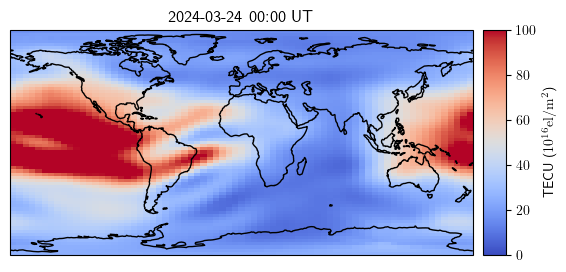

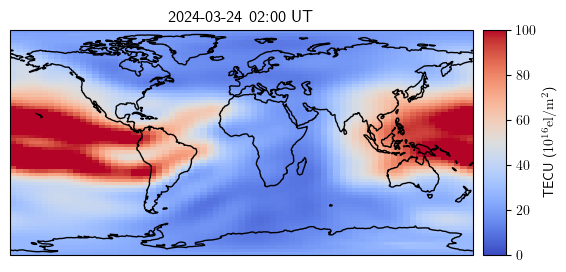

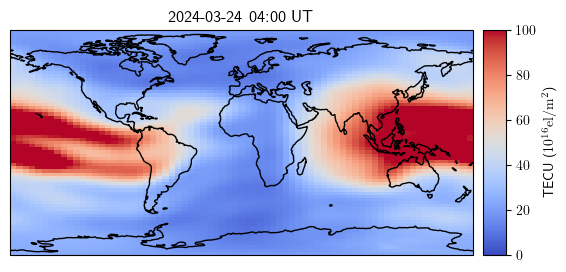

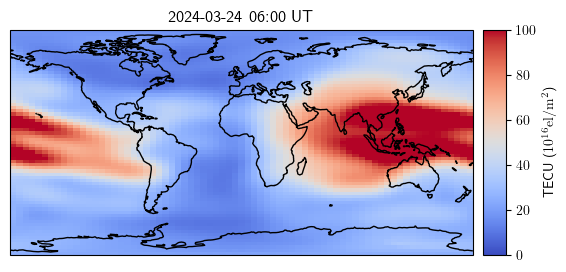

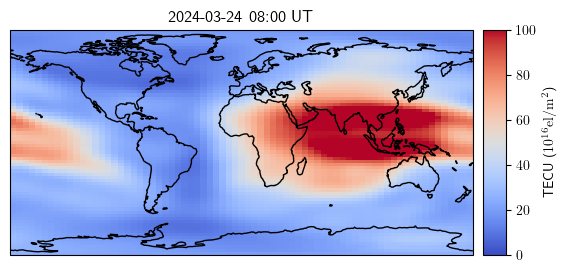

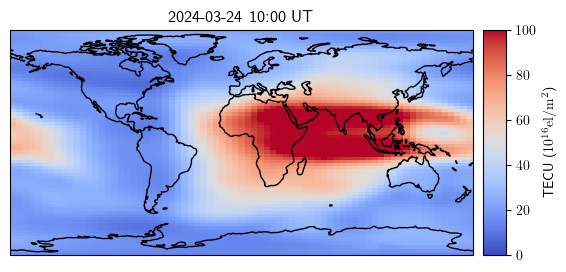

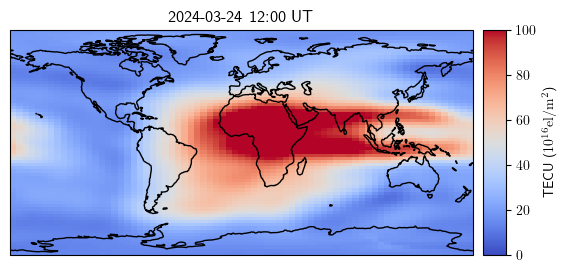

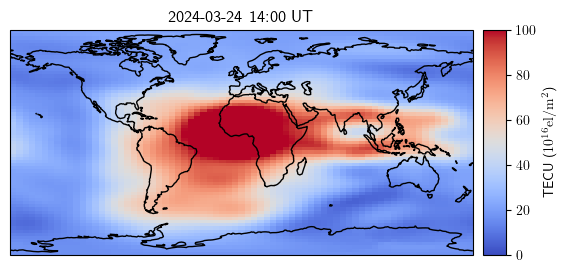

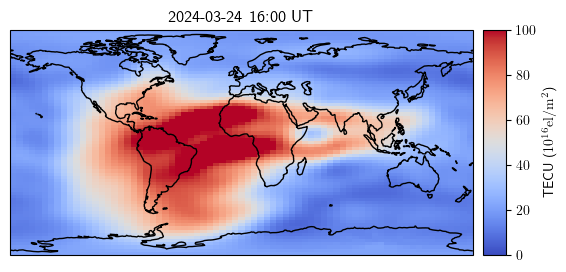

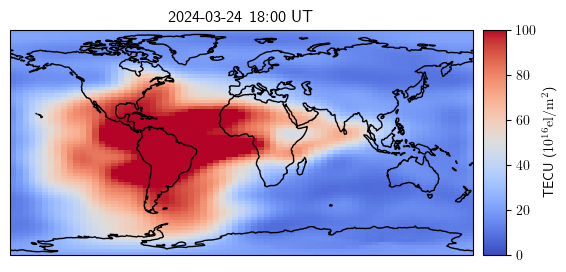

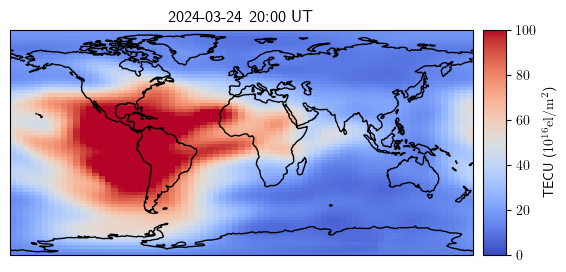

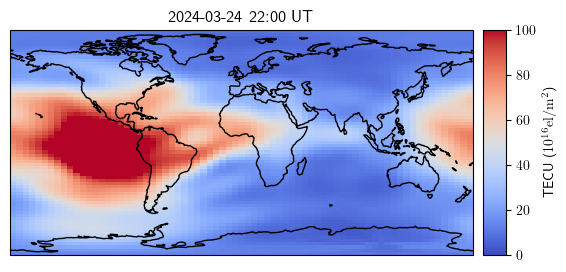

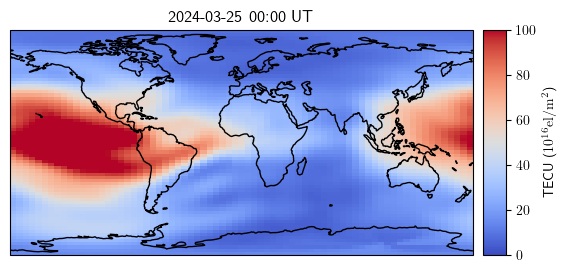

In [ ]:
for i in range(len(tecmaps)):
    plot_tec_map(tecmaps[i], time_array[i].iso[:-7])
    plt.show()